In [1]:
import numpy as np
import random
from matplotlib import pyplot as plt


In [2]:
def network_build(inp, o_count):
    weights = np.array([[]])
    #weights
    for ip in range(inp):
        w = np.array([])
        for i in range(o_count):
            a = np.array([np.random.normal()])
            w= np.hstack((w,a)) 
        if ip == 0:
            weights = w
        else:
            weights = np.vstack((weights, w))
    weights = weights
    print(weights)
    print(weights.shape)
    #biases
    biases = np.array([])
    for i in range(o_count):
        a = np.array([np.random.normal()])
        if i ==0:
            biases = a
        else:
            biases = np.hstack((biases, a))
    biases = biases
    print(biases)
    print(biases.shape)
    return weights, biases



inputs = np.array([[1,1,1],
                   [0,1,1],
                   [0,0,1],
                   [0,0,0],
                   [1,0,0],
                   [0,1,0],
                   [1,1,0],
                   [1,0,1]])
correct_output = np.array([[1, 1],
                           [0, 1],
                           [0, 0],
                           [0, 0],
                           [1, 0],
                           [0, 1],
                           [1, 1],
                           [1, 0]])
                           

In [21]:
inputs=np.array([[3,1.5],[2,1],[4,1.5],[3.5,.5],[3,1],[2,.5],[5.5,1],[1,1]])
correct_output = np.array([[1, 0],[0, 1],[1, 0],[1, 0],[0, 1],[0, 1],[1, 0],[0, 1]])
print(inputs[0].shape)

(2,)


In [22]:
weights, biases = network_build(len(inputs[0]),2)
weights_h, biases_h = network_build(2,2)

[[-0.05021932  0.39328487]
 [ 0.34428791 -0.98998607]]
(2, 2)
[ 1.15059418 -1.09309187]
(2,)
[[ 0.22404701  0.8502376 ]
 [ 0.43234427 -1.05043032]]
(2, 2)
[-0.13150674  0.40459494]
(2,)


In [23]:
def cost(output, c_o):
    cost = np.square(c_o-output)
    return cost
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def sigmoid_derivative(x):
    return x * (1 - x)
def prediction_t(weights, biases,inputs):
    output = np.add(inputs.dot(weights), biases)
    return sigmoid(output)

In [24]:
learning_rate = .05
costs = []
iterations = 70000
def pokemon_Trainer(weights, biases, weights_h, biases_h, iterations):
    global inputs, correct_output, learning_rate, costs
    place = 0
    for i in range(iterations):
        inp = inputs[place]
        c_o = correct_output[place]
        place += 1
        if place == len(inputs[0]):
            place = 0
        
        
        output_i = prediction_t(weights, biases, inp)
        output_f = prediction_t(weights_h, biases_h, output_i)
        
        error_h = c_o - output_f
        error_h_delta = error_h* sigmoid_derivative(output_f)
        
        costs.append(cost(output_f, c_o))
        error = error_h_delta.dot(weights_h.T)
        error_delta = error *sigmoid_derivative(output_i)
        
        weights+=learning_rate*inp.T.dot(error_delta)
        weights_h+= learning_rate*np.outer(output_i,error_h_delta)
        #biases idk
        biases+=learning_rate * error_delta 
        biases_h+=learning_rate* error_h_delta
    return weights,biases, weights_h, biases_h

In [25]:
weights, biases, weights_h, biases_h = pokemon_Trainer(weights,biases, weights_h, biases_h, iterations)

Synaptic weights after training: 
[[2.74380519 3.18730938]
 [3.13831241 1.80403844]]
Input 1: 4
Input 2: 1.5
New situation: input data =  4.0 1.5
[[0.98684086 0.01292983]]


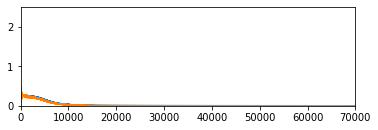

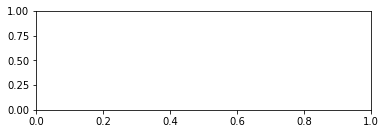

In [30]:
print("Synaptic weights after training: ")
print(weights)
A = float(input("Input 1: "))
B = float(input("Input 2: "))
#C = float(input("Input 3: "))

#print("New situation: input data = ", A, B, C)
print("New situation: input data = ", A, B)
#print("Output data: ")
#new_data = np.array([[A,B,C]])
new_data = np.array([[A,B]])
fp = prediction_t(weights_h, biases_h, prediction_t(weights, biases, new_data))
print(fp)
plt.figure(1)
plt.subplot(211)
plt.plot(costs)
plt.axis([0, iterations, 0, 2.5])
plt.show()
plt.subplot(212)
plt.show()